<a href="https://www.kaggle.com/code/jeremyfriesen123/a-i-snowday-predictor?scriptVersionId=216716231" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/cleaned_dataset.csv
/kaggle/input/helloworld/cleaned_dataset.csv
/kaggle/input/all-stats-ai/filtered_dataset_1.csv
/kaggle/input/hellow/cleaned_dataset.csv
/kaggle/input/helloworld1/cleaned_dataset.csv
/kaggle/input/new-dataset/cleaned_dataset.csv


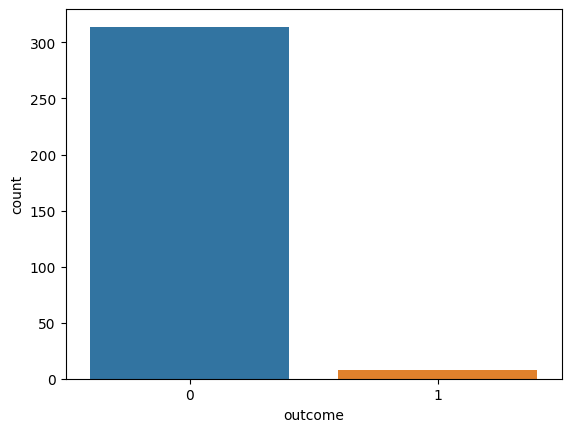

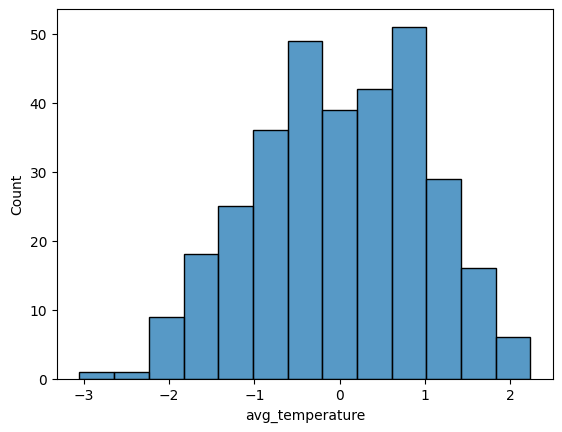

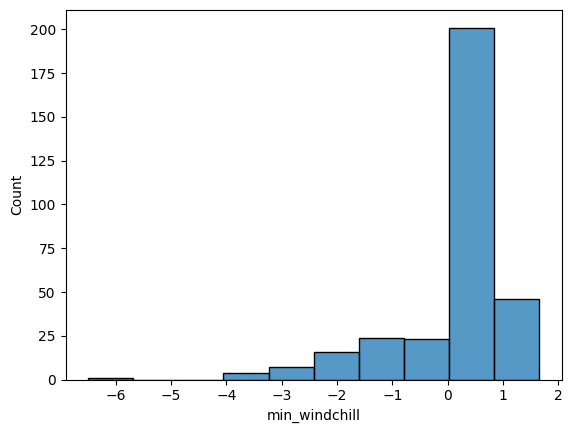

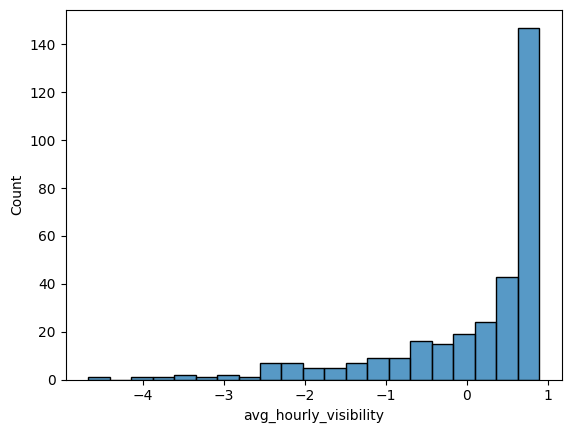

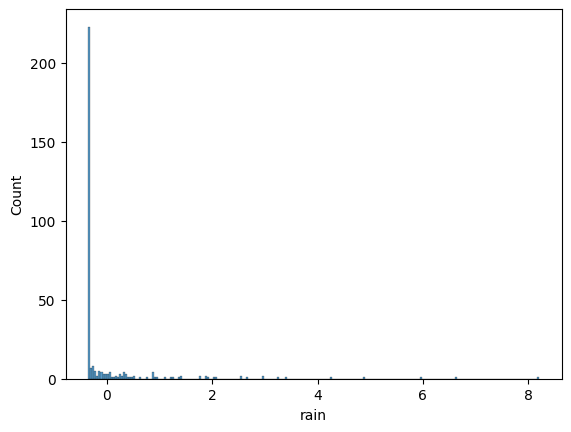

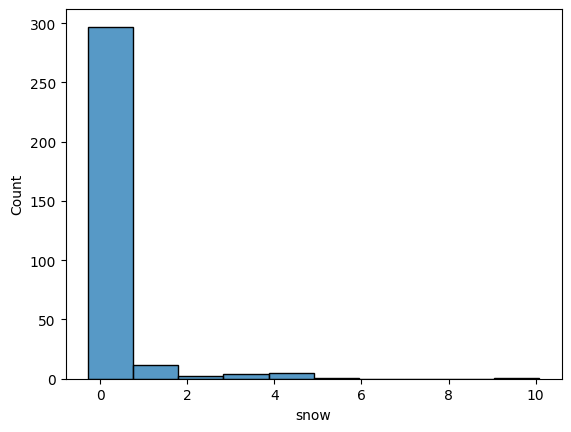

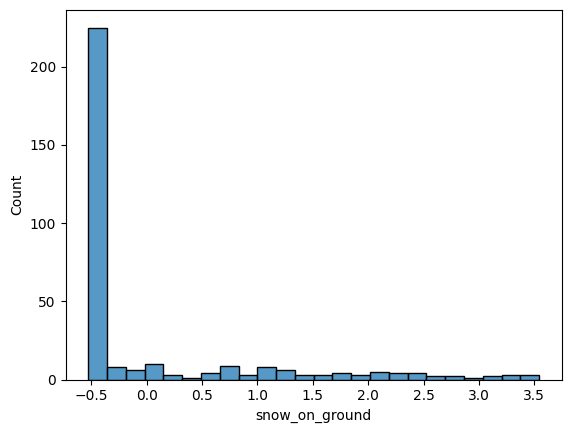

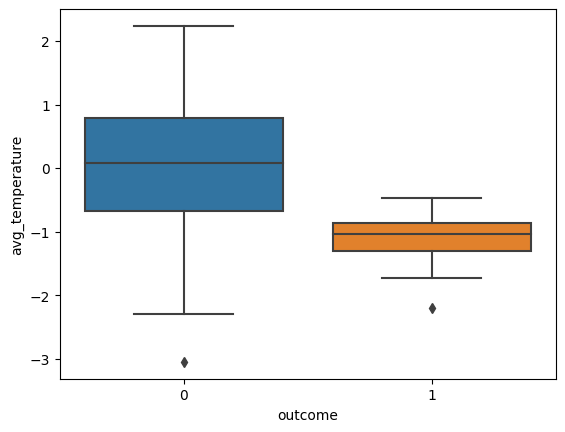

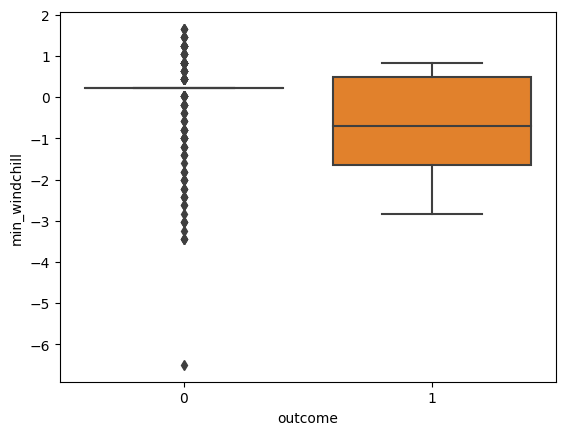

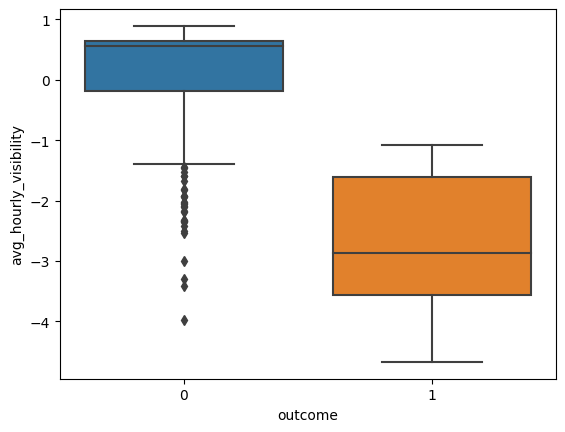

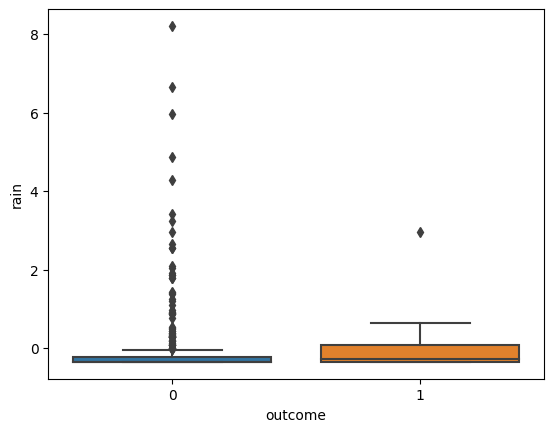

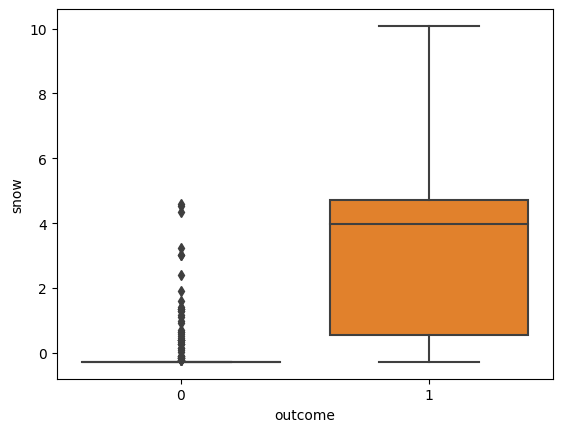

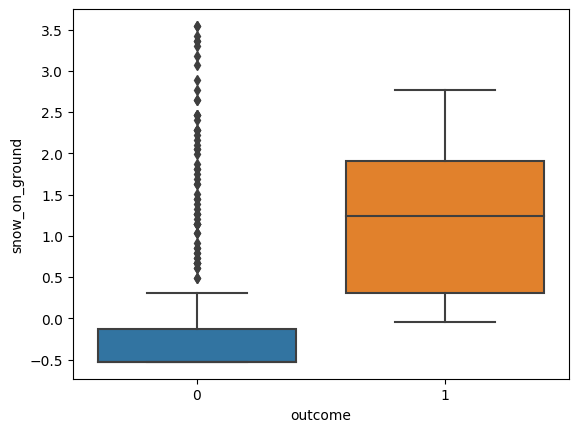

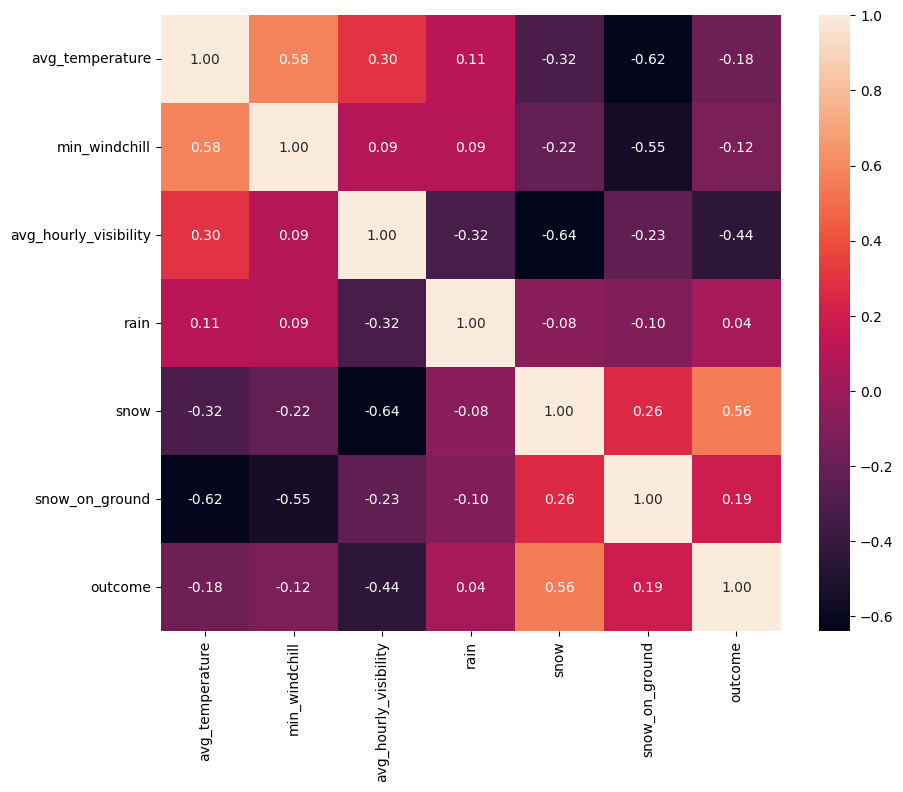

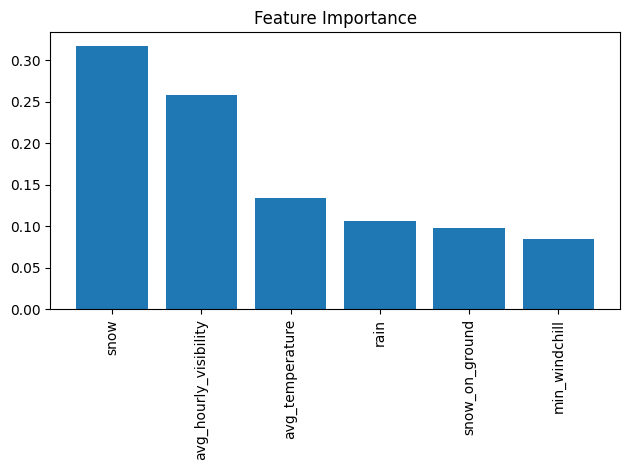

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('/kaggle/input/helloworld1/cleaned_dataset.csv')

# Exclude non-numerical columns 
numerical_features = df.select_dtypes(include=[np.number]).drop(columns=['outcome'])
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

# Convert to data frame
numerical_features_scaled_df = pd.DataFrame(numerical_features_scaled, columns=numerical_features.columns, index=df.index)
df_scaled = pd.concat([numerical_features_scaled_df, df['outcome']], axis=1)

# Target variable distribution
sns.countplot(x='outcome', data=df_scaled)
plt.show()

# Distribution of all individual features
for col in numerical_features_scaled_df.columns:
    sns.histplot(numerical_features_scaled_df[col])
    plt.show()

# Relationship with the target variable
for col in numerical_features_scaled_df.columns:
    sns.boxplot(x='outcome', y=col, data=df_scaled)
    plt.show()

# Correlation Analysis
plt.figure(figsize=(10, 8))
correlation_matrix = df_scaled.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()


# Prepare the features and target variable
X = numerical_features_scaled_df
y = df_scaled['outcome']

# Fit the model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Plot the feature importances
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()


Accuracy: 0.9538461538461539

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        62
           1       1.00      0.00      0.00         3

    accuracy                           0.95        65
   macro avg       0.98      0.50      0.49        65
weighted avg       0.96      0.95      0.93        65



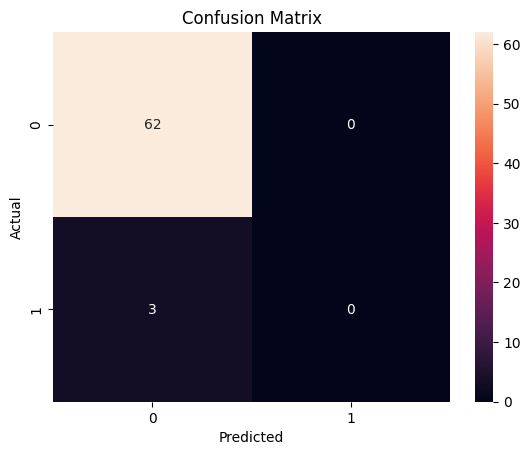

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.utils import class_weight


df = pd.read_csv('/kaggle/input/helloworld1/cleaned_dataset.csv')
# Exclude non-numerical columns
numerical_features = df.select_dtypes(include=[np.number]).drop(columns=['outcome'])
scaler = StandardScaler()

# Fit the scaler to the numerical features 
numerical_features_scaled = scaler.fit_transform(numerical_features)

# Convert the array back to a dataframe
numerical_features_scaled_df = pd.DataFrame(numerical_features_scaled, columns=numerical_features.columns, index=df.index)

# Add the non-scaled outcome variable back to the dataframe
df_scaled = pd.concat([numerical_features_scaled_df, df['outcome']], axis=1)

# Prepare the features and target variable
X = df_scaled.drop('outcome', axis=1)
y = df_scaled['outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Fit the model 
model = RandomForestClassifier(random_state=42, class_weight=class_weights_dict)
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [4]:
import joblib

joblib.dump(model, 'random_forest_model.joblib')
loaded_model = joblib.load('random_forest_model.joblib')
